# The Quantum Encryption Problem

Alice and Bob want to use entangled [Bell Pairs](https://en.wikipedia.org/wiki/Bell_state) to create a shared secret. If you're a bit rusty on your quantum mechanics, here's a brief refresher on entaglement.


Each of the particles in a Bell pair will be observed to be either spin 'up' or spin 'down' at random, but when their spin is observed along this same axis they will never match. If their spin is observed along different axes it will be entirely uncorrelated.

Alice sends one particle from each of her great supply of Bell pairs to Bob. They each chose to observe their particles' spins along the X or Y axes at random, and later threw out any pairs for which they measured along different axes. They will use the results of these experiments (up/down or down/up) to create a shared secret, which they will use for [one time pad encryption](https://en.wikipedia.org/wiki/One-time_pad) in the rest of their communication.

Eve wants to eavesdrop on Alice and Bob, and so may intercept the particles en route to Bob. If she does, she will destroy the entanglement, making the particles’ spins uncorrelated even when Alice and Bob choose the same axis.

Unfortunately Alice and Bob do not have a very good way of sending coherent Bell pairs to each other, so the noise of their channel will destroy the entanglement 50% of the time even if Eve isn’t watching.

To see if Eve is listening in, Alice and Bob share a small portion of their results (after throwing away the ones where they picked different axes), to see how well they match. 

Alice tells Bob that she observed the following pattern: UDUUUUUUDDDUDDUUUDDD

whereas bob received: DDUUUDDDDDUDUDDUDUDU

What is the chance that Eve intercepted their communication?

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite

import thinkplot
import random

decoherenceChance = 0.5

In [2]:
def generate(length, listening):
    """generates a test string for alice and bob"""
    choices = ['U','D']
    coherentChoices = [('U','D'),('D','U')]
    if(listening):
        return[(random.choice(choices),random.choice(choices)) for x in range(length)]
    else:
        res = []
        for i in range(length):
            if random.random() < decoherenceChance: #chance of decoherence
                res.append((random.choice(choices),random.choice(choices)))
            else:
                res.append(random.choice(coherentChoices))
        return res

In [3]:
class Qantum(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: tuple of spins, the first being Alice's and the second being Bob's. (U,U), (U,D), (D,U), or (D,D)
        hypo: True or False, whether Eve is listening
        """
        if(hypo):
            #if Eve is listening, there is an equal chance of all results
            return 0.25
        else:
            match = data[0]==data[1]
            if(match):
                #this can happen if the particles decohere and they match (50% chance)
                #since there are two ways to match, we also multiply by 0.5 again
                return decoherenceChance*0.5*0.5
            else:
                #this can happen if the particles don't decohere
                #or if they and it happens that they don't match (50% chance)
                #again, we multiply everything by 0.5 since there are two ways of
                #not matching
                return ((1-decoherenceChance)+(decoherenceChance)*0.5)*0.5
                

No handles with labels found to put in legend.


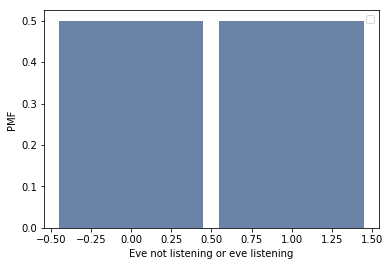

In [4]:
prior = Qantum([False,True])
thinkplot.Hist(prior)
thinkplot.Config(xlabel='Eve not listening or eve listening', ylabel='PMF')

No handles with labels found to put in legend.


Is Eve eavesdropping? here are the chances:
False 0.14452449697035955
True 0.8554755030296405


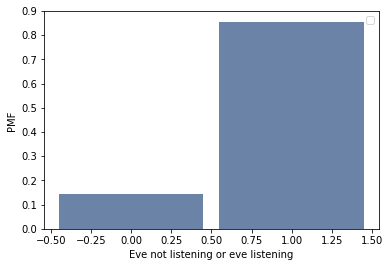

In [5]:
posterior = prior.Copy()
A='UDUUUUUUDDDUDDUUUDDD'
B='DDUUUDDDDDUDUDDUDUDU'
results = zip(A,B)
posterior.UpdateSet(results)
thinkplot.Hist(posterior)
thinkplot.Config(xlabel='Eve not listening or eve listening', ylabel='PMF')
print("Is Eve eavesdropping? here are the chances:")
posterior.Print()

Here's what it looks like when eve isn't listening:

No handles with labels found to put in legend.


Is Eve eavesdropping? here are the chances:
False 0.991945724276506
True 0.008054275723494026


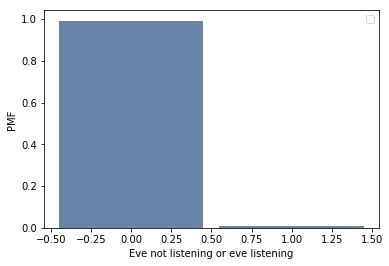

In [6]:
posterior = prior.Copy()
results = generate(20,False)
posterior.UpdateSet(results)
thinkplot.Hist(posterior)
thinkplot.Config(xlabel='Eve not listening or eve listening', ylabel='PMF')
print("Is Eve eavesdropping? here are the chances:")
posterior.Print()